<a href="https://colab.research.google.com/github/NMThanh123/Term-Project-of-course-AI/blob/main/train_age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, AveragePooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2 as cv
import os
import pickle
from keras.models import load_model
from sklearn.preprocessing import LabelBinarizer
from keras.utils import normalize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def save_data(root_folder):

    dest_size = (150, 150)
    print("Bắt đầu xử lý ảnh...")

    images = []
    labels = []

    # Lặp qua các thư mục con con trong thư mục gốc
    for folder in os.listdir(root_folder):
        if folder!='.DS_Store':
            print("Folder =",folder)
            # Lặp qua các file trong từng thư mục con  chứa các ảnh
            for file in os.listdir(root_folder+'/'+folder):
                if file!='.DS_Store':
                    # print("File=", file)
                    images.append(cv.resize(cv.imread(root_folder + '/' + folder +"/" + file), dsize=dest_size))
                    labels.append(folder)

    images = np.array(images)
    labels = np.array(labels)

    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)
    print(labels)

    file = open('/content/drive/MyDrive/Cuoi_ky_AI/Code/data_age.data', 'wb')
    # dump information to that file
    pickle.dump((images,labels), file)
    # close the file
    file.close()
    return images, labels

images, labels = save_data('/content/drive/MyDrive/Cuoi_ky_AI/data/age')

Bắt đầu xử lý ảnh...
Folder = 46-65
Folder = 1-2
Folder = 19-29
Folder = 10-18
Folder = 86-100
Folder = 66-85
Folder = 3-9
Folder = 30-45
[[0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# initial parameters
epochs = 60
lr = 1e-3
batch_size = 64
img_dims = (150, 150, 3)

# Load data, transfer to array and pre-processing
file = open('/content/drive/MyDrive/age.data', 'rb')
images, labels = pickle.load(file)

print(images.shape, labels.shape)
# images = images.astype('float')/255.0

(11419, 150, 150, 3) (11419, 8)


In [ ]:
# # split dataset for training and validation
trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=10)
# t = testX
trainX = trainX.astype('float32')/255.0
testX = testX.astype('float32')/255.0

# trainY = to_categorical(trainY, num_classes=8) # [[1, 0, 0, 0, 0, 0, 0], [0, 1], [0, 1, 0, 0, 0, 0, 0], [...]
# testY = to_categorical(testY, num_classes=8)

aug = ImageDataGenerator(rotation_range=15, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.5, zoom_range=0.5,
                         horizontal_flip=True, fill_mode="nearest")


In [ ]:
# define model
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    # if K.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
    #     inputShape = (depth, height, width)
    #     chanDim = 1
    
    # The axis that should be normalized, after a Conv2D layer with data_format="channels_first", 
    # set axis=1 in BatchNormalization.


    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same",input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # model.add(Dropout(0.25))

    model.add(Conv2D(256, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(256, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(512, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(512, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))


    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())

    model.add(Dense(classes))
    model.add(Activation("softmax"))

    return model

# build model
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2], classes=8)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 activation (Activation)     (None, 150, 150, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 75, 75, 64)        0

In [ ]:
batch_size = 64
epochs = 100

In [ ]:
# compile the model
opt = Adam(learning_rate=lr)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the model
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),validation_data=aug.flow(testX,testY,batch_size=batch_size), steps_per_epoch=len(trainX)//batch_size, epochs=epochs, verbose=1)


<ipython-input-9-f7fb9dd29669>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),validation_data=aug.flow(testX,testY,batch_size=batch_size), steps_per_epoch=len(trainX)//batch_size, epochs=epochs, verbose=1)


Epoch 1/100
142/142 [==============================] - 97s 587ms/step - loss: 2.0534 - accuracy: 0.2742 - val_loss: 2.0433 - val_accuracy: 0.2793
Epoch 2/100
142/142 [==============================] - 69s 486ms/step - loss: 1.6614 - accuracy: 0.3412 - val_loss: 2.3575 - val_accuracy: 0.2824
Epoch 3/100
142/142 [==============================] - 68s 481ms/step - loss: 1.4840 - accuracy: 0.3906 - val_loss: 1.9256 - val_accuracy: 0.2697
Epoch 4/100
142/142 [==============================] - 77s 540ms/step - loss: 1.3813 - accuracy: 0.4310 - val_loss: 1.7274 - val_accuracy: 0.3284
Epoch 5/100
142/142 [==============================] - 66s 468ms/step - loss: 1.3450 - accuracy: 0.4489 - val_loss: 1.4944 - val_accuracy: 0.4046
Epoch 6/100
142/142 [==============================] - 76s 538ms/step - loss: 1.2915 - accuracy: 0.4615 - val_loss: 1.3458 - val_accuracy: 0.4518
Epoch 7/100
142/142 [==============================] - 74s 522ms/step - loss: 1.2416 - accuracy: 0.4797 - val_loss: 1.5618 -

In [ ]:

# save the model to disk
H.model.save('/content/drive/MyDrive/Cuoi_ky_AI/model_train/age_detection_final.h5')

In [ ]:
# Checking the train and test loss and accuracy values from the neural network above.

train_loss = H.history['loss']
test_loss = H.history['val_loss']
train_accuracy = H.history['accuracy']
test_accuracy = H.history['val_accuracy']

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

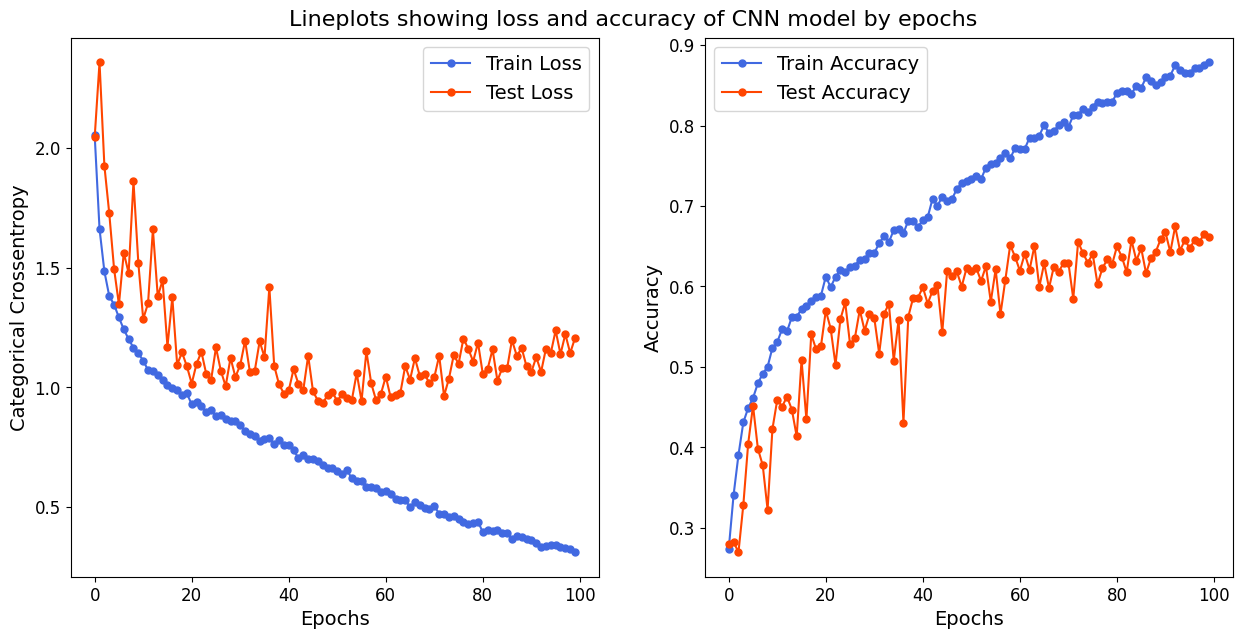

In [ ]:
# Plotting a line chart to visualize the loss and accuracy values by epochs.

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)

1/1 [==============================] - 1s 1s/step
46-65


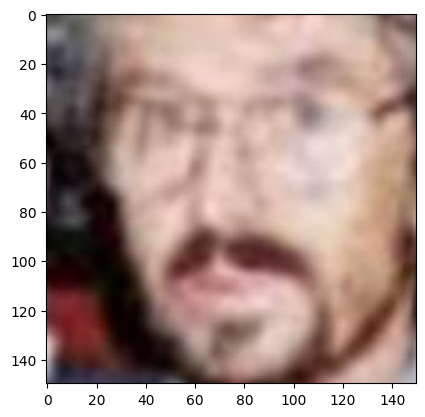

In [ ]:
model = load_model('/content/drive/MyDrive/Cuoi_ky_AI/model_train/age_detection_final.h5')
gender = ['1-2', '3-9', '10-18', '19-29', '30-45', '46-65', '66-85', '86-100']
test1 = testX[6]
test1 = np.expand_dims(test1, axis=0)
result = model.predict(test1)[0]
print(gender[np.argmax(result)])
test = np.array(testX[6]*255.0, dtype=np.uint8)
test = cv.cvtColor(test, cv.COLOR_BGR2RGB)
plt.imshow(test)
plt.show()

1/1 [==============================] - 0s 222ms/step
30-45


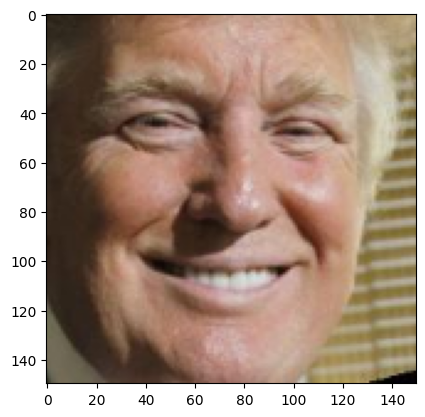

In [ ]:
gender = ['1-2', '3-9', '10-18', '19-29', '30-45', '46-65', '66-85', '86-100']
test1 = testX[10]
test1 = np.expand_dims(test1, axis=0)
result = model.predict(test1)[0]
print(gender[np.argmax(result)])
test = np.array(testX[10]*255.0, dtype=np.uint8)
test = cv.cvtColor(test, cv.COLOR_BGR2RGB)
plt.imshow(test)
plt.show()

1/1 [==============================] - 0s 319ms/step
30-45


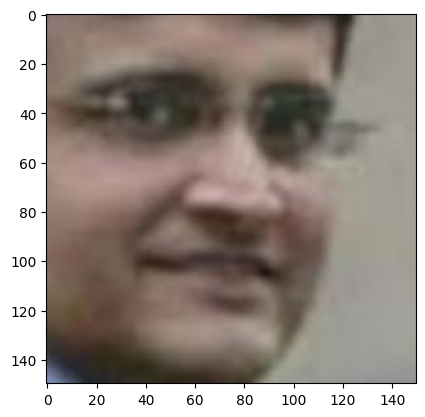

In [ ]:
age = ['1-2', '3-9', '10-18', '19-29', '30-45', '46-65', '66-85', '86-100']
test1 = testX[874]
test1 = np.expand_dims(test1, axis=0)
result = model.predict(test1)[0]
print(age[np.argmax(result)])
test = np.array(testX[874]*255.0, dtype=np.uint8)
test = cv.cvtColor(test, cv.COLOR_BGR2RGB)
plt.imshow(test)
plt.show()

1/1 [==============================] - 0s 216ms/step
10-18


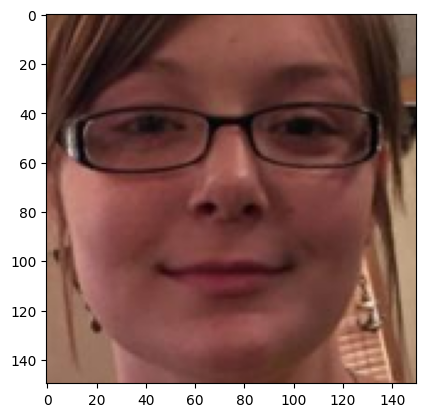

In [ ]:
age = ['1-2', '3-9', '10-18', '19-29', '30-45', '46-65', '66-85', '86-100']
test1 = testX[944]
test1 = np.expand_dims(test1, axis=0)
result = model.predict(test1)[0]
print(age[np.argmax(result)])
test = np.array(testX[944]*255.0, dtype=np.uint8)
test = cv.cvtColor(test, cv.COLOR_BGR2RGB)
plt.imshow(test)
plt.show()

1/1 [==============================] - 0s 215ms/step
1-2


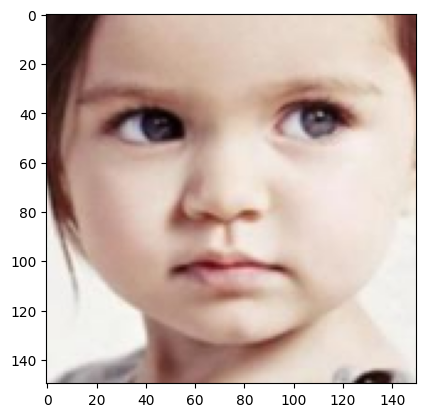

In [ ]:
age = ['1-2', '3-9', '10-18', '19-29', '30-45', '46-65', '66-85', '86-100']
test1 = testX[355]
test1 = np.expand_dims(test1, axis=0)
result = model.predict(test1)[0]
print(age[np.argmax(result)])
test = np.array(testX[355]*255.0, dtype=np.uint8)
test = cv.cvtColor(test, cv.COLOR_BGR2RGB)
plt.imshow(test)
plt.show()

1/1 [==============================] - 0s 195ms/step
46-65


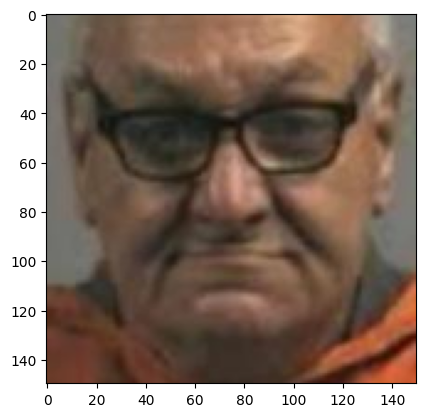

In [ ]:
age = ['1-2', '3-9', '10-18', '19-29', '30-45', '46-65', '66-85', '86-100']
test1 = testX[393]
test1 = np.expand_dims(test1, axis=0)
result = model.predict(test1)[0]
print(age[np.argmax(result)])
test = np.array(testX[393]*255.0, dtype=np.uint8)
test = cv.cvtColor(test, cv.COLOR_BGR2RGB)
plt.imshow(test)
plt.show()

1/1 [==============================] - 0s 39ms/step
30-45


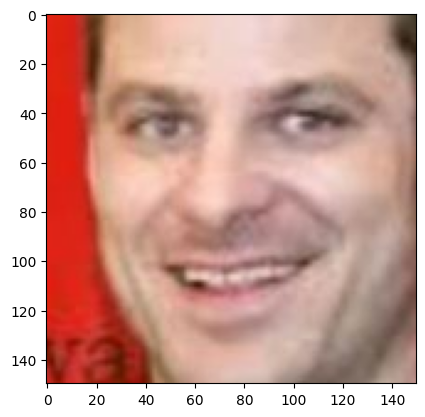

In [ ]:
test1 = testX[46]
test1 = np.expand_dims(test1, axis=0)
result = H.model.predict(test1)[0]
print(age[np.argmax(result)])
test = np.array(testX[46]*255.0, dtype=np.uint8)
test = cv.cvtColor(test, cv.COLOR_BGR2RGB)
plt.imshow(test)
plt.show()
